In [8]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time 
import mediapipe as mp

In [9]:
mp_holistic = mp.solutions.holistic # make detections
mp_drawing = mp.solutions.drawing_utils # draw 

In [10]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # color conversion from cv2
    image.flags.writeable = False                   # image is not writable
    results = model.process(image)                 # make predictions using mediapipe
    image.flags.writeable = True                   # set it back to writable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # color conversion to cv2
    return image, results

In [11]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # draw face connections  
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # draw left hand connections 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # draw right hand connections 

In [12]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                             mp_drawing.DrawingSpec(color = (80, 22, 10), thickness = 1, circle_radius = 4),
                              mp_drawing.DrawingSpec(color = (80, 44, 121), thickness = 1, circle_radius = 2),
                             ) # draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color = (80, 22, 10), thickness = 2, circle_radius = 4),
                              mp_drawing.DrawingSpec(color = (80, 44, 121), thickness = 2, circle_radius = 2),
                             ) # draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color = (121, 22, 76), thickness = 2, circle_radius = 4),
                              mp_drawing.DrawingSpec(color = (121, 44, 250), thickness = 2, circle_radius = 2),
                             ) # draw left hand connections 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color = (245, 117, 66), thickness = 2, circle_radius = 4),
                              mp_drawing.DrawingSpec(color = (245, 66, 230), thickness = 2, circle_radius = 2),
                             ) # draw right hand connections 

In [13]:
cap = cv2.VideoCapture(0)
# set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=.5, min_tracking_confidence=.5) as holistic: # setting initial detection confidence & traking confidence
    while cap.isOpened():
        
        ret, frame = cap.read()
    
        # detecting and saving the landmarks 
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        #draw the landmarks 
        draw_styled_landmarks(image, results)
        
        cv2.imshow('OpenCV Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
results

mediapipe.python.solution_base.SolutionOutputs

In [59]:
draw_landmarks(frame, results)

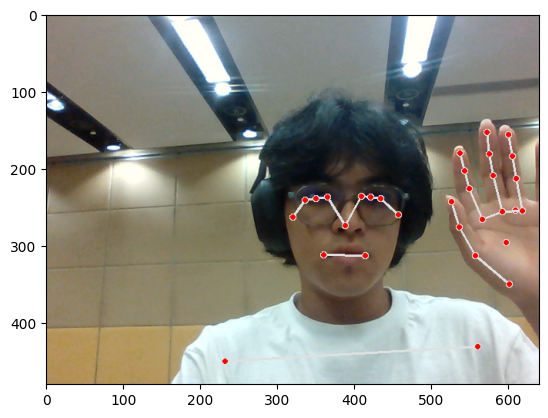

In [60]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [7]:
def extract_keypoints(results):
    # format the landmark so I can be pass into the lstm model later 
    face = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)
    return np.concatenate([pose, face, lh, rh])

In [100]:
result_test = extract_keypoints(results)

In [101]:
result_test

array([ 3.18749994e-01,  5.80094695e-01, -1.18381953e+00,  9.99677300e-01,
        3.39427769e-01,  5.03878355e-01, -1.11345398e+00,  9.99304414e-01,
        3.58605444e-01,  5.07180452e-01, -1.11349273e+00,  9.99343574e-01,
        3.76236320e-01,  5.11030614e-01, -1.11392260e+00,  9.99221563e-01,
        2.80633867e-01,  4.95915383e-01, -1.12766623e+00,  9.99362171e-01,
        2.55040944e-01,  4.95345861e-01, -1.12685347e+00,  9.99451101e-01,
        2.31176540e-01,  4.96304303e-01, -1.12731755e+00,  9.99389172e-01,
        3.96815538e-01,  5.46558976e-01, -6.11541510e-01,  9.99065697e-01,
        1.80063039e-01,  5.37894368e-01, -6.44347548e-01,  9.99577582e-01,
        3.43986273e-01,  6.55765116e-01, -9.90725636e-01,  9.99696910e-01,
        2.75475055e-01,  6.60317123e-01, -1.00175834e+00,  9.99769330e-01,
        5.38416207e-01,  8.96345258e-01, -2.95860112e-01,  9.98222589e-01,
        3.47378701e-02,  9.59919214e-01, -4.46422666e-01,  9.98029232e-01,
        6.42314315e-01,  

In [8]:
DATA_PATH = os.path.join('MP_DATA') # path for the exported data (numpy array)
actions = np.array(['hello', 'thanks', 'iloveyou']) # actions that we try to detect (labels)

# 30 videos worth of data
no_sequence = 30 

# videos are 30 frames in length
sequence_length = 30


In [66]:
for action in actions: # creating all the dir needed for our labels
    for sequence in range(no_sequence):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence))) # make the dir for different labels, to make it more clean
        except: 
            pass # execute when the dir already exist 

In [10]:
cap = cv2.VideoCapture(0)
# set mediapipe model
with mp_holistic.Holistic(min_detection_confidence= .5, min_tracking_confidence= .5) as holistic:
    # loop through actions 
    for action in actions:
        # loop through sequence (videos)
        for sequence in range(no_sequence):
            # loop through video length aka sequence length
            for frame_num in range(sequence_length):
                # read feed
                ret, frame = cap.read()
    
                # make decision 
                image, results = mediapipe_detection(frame, holistic)
                print(results)
    
                # draw landmarks 
                draw_styled_landmarks(image, results)
            
                # apply wait logic (30 frames in video we collect & apply a delay until the next video is captured)
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                               cv2.FONT_HERSHEY_SIMPLEX, .5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, .5, (0,0,255), 1, cv2.LINE_AA)
                 
                # new export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                    
    
                # show to screen
                cv2.imshow('openCV Feed', image)
                
    
    
                # stop the video recording
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
        
    cap.release()
    cv2.destroyAllWindows()
    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import to_categorical

In [11]:
label_map = {label:num for num, label in enumerate(actions)}

In [12]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [13]:
sequences, labels = [], []
for action in actions: 
    for sequence in range(no_sequence):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
            
        sequences.append(window)
        labels.append(label_map[action])
         

In [14]:
np.array(sequences).shape

C:\Users\User\AppData\Local\Temp\ipykernel_34672\1188987122.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(sequences).shape


(90, 30)

In [15]:
np.array(labels).shape

(90,)

In [109]:
X = np.array(sequences)

C:\Users\User\AppData\Local\Temp\ipykernel_12256\2138012482.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(sequences)


In [110]:
y = to_categorical(labels).astype(int)

In [111]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .05)

In [113]:
y_test.shape

(5, 3)

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense 
from tensorflow.keras.callbacks import TensorBoard

In [115]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [1]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation = 'relu', input_shape = (30, 1662)))
model.add(LSTM(128, return_sequences = True, activation = 'relu'))
model.add(LSTM(64, return_sequences =False, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

NameError: name 'Sequential' is not defined

In [ ]:
res = [.7, .2, .1]

In [118]:
actions[np.argmax(res)]

'hello'

In [119]:
model.compile(optimizer='Adam', loss='categorical_crossentrophy', metrics=['categorical_accuracy'])

In [120]:
model.fit(X_train, y_train, epochs = 2000, callbacks = [tb_callback])

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).